# Data Science and Visualization (RUC F2023)

## Lecture 10: Data Science in Practice

 # More advanced visualization

## 1. Line charts with ranges

In [1]:
import seaborn as sns
flights = sns.load_dataset("flights")

In [2]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
flights.shape

(144, 3)

Passing the entire dataset in (year, month, passengers) format will aggregate over repeated values (each year) to show the mean and 95% confidence interval:

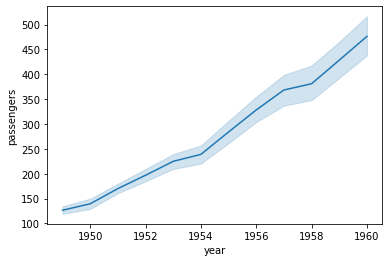

In [4]:
sns.lineplot(data=flights, x="year", y="passengers")

We can do the same thing by using matplotlib:

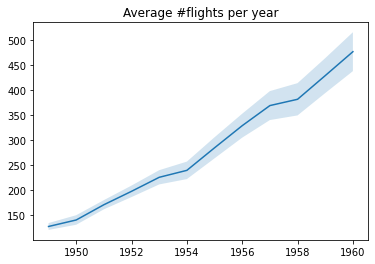

In [39]:
import matplotlib.pyplot as plt

# Get the group_by mean and stand deviations
flights_groupby_year = flights.groupby(['year'])['passengers']
flights_year_mean = flights_groupby_year.mean()
flights_year_std = flights_groupby_year.std()

x = flights_year.index
y = flights_year.values

plt.yticks(range(100, 550, 50))
plt.title('Average #flights per year')

# Plot the data as a line
plt.plot(x, y)

# Plot the range
plt.fill_between(x, y-flights_year_std/2, y+flights_year_std/2, alpha=0.2)

In [63]:
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

## 2. Radar Charts

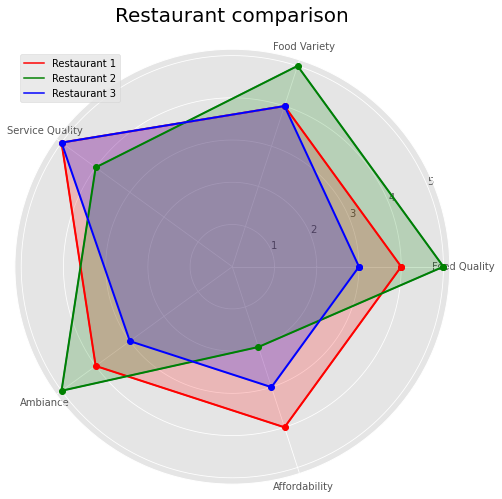

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Categories/Dimensions
categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']

# Data
restaurant_1 = [4, 4, 5, 4, 4]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 3]
dataLenth = len(categories)

# Prepare the data
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) # Close

restaurant_1 = np.concatenate((restaurant_1, [restaurant_1[0]])) # Close
restaurant_2 = np.concatenate((restaurant_2, [restaurant_2[0]])) # Close
restaurant_3 = np.concatenate((restaurant_3, [restaurant_3[0]])) # Close


plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

# Plot each data
plt.plot(angles, restaurant_1, label='Restaurant 1')
plt.fill(angles, restaurant_1, facecolor='r', alpha=0.2) # Filling
plt.plot(angles, restaurant_1, 'ro-', linewidth=2) # Line type

plt.plot(angles, restaurant_2, label='Restaurant 2')
plt.fill(angles, restaurant_2, facecolor='g', alpha=0.2) # Filling
plt.plot(angles, restaurant_2, 'go-', linewidth=2) # Line type

plt.plot(angles, restaurant_3, label='Restaurant 3')
plt.fill(angles, restaurant_3, facecolor='b', alpha=0.2) # Filling
plt.plot(angles, restaurant_3, 'bo-', linewidth=2) # Line type

plt.title('Restaurant comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(angles), labels=categories)

# Specify the legend
import matplotlib.lines as mlines
r1 = mlines.Line2D([], [], color='red', ls='-', label='Restaurant 1')
r2 = mlines.Line2D([], [], color='green', ls='-', label='Restaurant 2')
r3 = mlines.Line2D([], [], color='blue', ls='-', label='Restaurant 3')

plt.legend(handles=[r1, r2, r3], loc='upper left')
plt.grid(True)
plt.show()

## 3. Pies

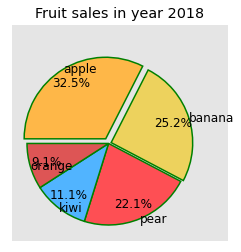

In [66]:
import matplotlib.pyplot as plt

# Theme style of the plot
plt.style.use('ggplot')

# Data
percents = [0.325, 0.252, 0.221, 0.111, 0.091]
labels = ['apple','banana','pear','kiwi','orange']

# Which label(s) to highlight? How much to move outward?
explode = [0.1, 0.05, 0, 0, 0] 
# Colors for each label
colors=['#FEB748','#EDD25D','#FE4F54','#51B4FF','#dd5555']


# Make it a pie, not ellipse
plt.axes(aspect='equal')

# Control the x and y limits
plt.xlim(0, 4)
plt.ylim(0, 4)

# Plot the pie
plt.pie(x = percents,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%.1f%%', # Format of percantage: with one decimal here
    pctdistance=0.8, # Distance from the percentage to the circle center
    labeldistance = 1.0, # Label distance to the center
    startangle = 180, # First label's angle
    radius = 1.5, 
    counterclock = False, 
    wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# edge properties
    textprops = {'fontsize':12, 'color':'k'}, # text properties
    center = (1.8, 1.8), 
    frame = 1 ) # Frame?

# Make sure no x and y ticks
plt.xticks(())
plt.yticks(())

plt.title('Fruit sales in year 2018')

plt.show()

## 4. Scatterplot with varied point size

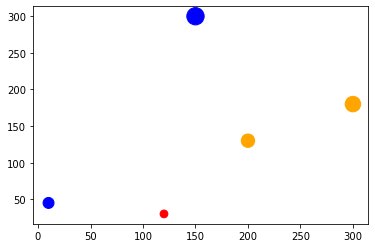

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# The data is in a dictionary (a key-value mapping in Python)
d = {"year": pd.Series([2006, 2007, 2008, 2009, 2010]),
     "amount": pd.Series([10, 200, 120, 150, 300]),
     "size": pd.Series([45, 130, 30, 300, 180]),
     "labels": pd.Series([1, 2, 0, 1, 2]),
     "judge": pd.Series([True, True, True, True, True])}

# We create a DataFrame from the dictionary. The keys will be the column names
df = pd.DataFrame(d)

# The function rank() sort the whole column and assign rank scores based on the ordering:
# The larger the size, the higher the rank score.
size = df['size'].rank()

# Enlargement factor
n = 60

# Define a dictionary of colors for labels
color ={0:'red', 1:'blue', 2:'orange'}

# The color of each point is decided by the color dictionary defined above and the point's label
plt.scatter(df['amount'], df['size'], color=[color[i] for i in df['labels']], s=size*n, alpha=1)
plt.show()

### References
* https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca